## Laboratory Assignment 12 Solutions
Author: Laura Bissoltan

### Problem 1

In [281]:
#1.1 Analytical solution

import numpy as np
from numpy import e,cos,pi

def f(x):
    return e**(4*x)*cos(2*x)

b=pi/4
a=0

I1=2.1140692632779268
print("Exact value of integral:", I1)


Exact value of integral: 2.1140692632779268


In [282]:
#1.2 Composite rectangular integration


def rec(g,N):    
    h=(b-a)/N
    s=0
    for i in range(0,N-1):
        s=s+f(a+i*h)
    I_r=s*h
    e_r=((I1-I_r)/I1)*100
    return I_r, e_r

I_r, e_r=rec(f,100)
print("I_R:",I_r,"\nE_R",e_r)

I_R: 2.1149713369578613 
E_R -0.0426700153870959


In [283]:
#1.3 Composite midpoint integration

def mid(g,N):
    h=(b-a)/N

    s=0
    for i in range(0,N-1):
        s=s+f((a+(i+1)*h+(a+i*h))/2)
    I_MP=s*h
    e_mp=((I1-I_MP)/I1)*100
    return I_MP,e_mp

I_MP,e_mp=mid(f,100)
print("I_MP:",I_MP, "\nE_MP:",e_mp)


I_MP: 2.1127933145662547 
E_MP: 0.06035510443464041


In [284]:
#1.4 Composite trapezoidal rule

def trapezoidal(g,N):
    
    h=(b-a)/N
    t=0
    for i in range(1,N):
        t=t+f(a+i*h)
    I_T=(f(a)+2*t+f(b))*h/2
    e_t=((I1-I_T)/I1)*100
    return I_T,e_t

I_T,e_t=trapezoidal(f,100)
print("I_T:",I_T, "\nE_T:",e_t)
    

I_T: 2.1138108067379866 
E_T: 0.012225547404223722


In [285]:
#1.5 Composite Simpson’s 1/3 rule

def f(x):
    return e**(4*x)*cos(2*x)

def simpson(g,N):

    h=(b-a)/N
    c=0
    for i in range(1,N-1,2):
        c=c+f(a+i*h)
        
    d=0
    for i in range(2,N-2,2):
        d=d+f(a+i*h)
        
    I_S=(f(a)+4*c+2*d+f(a+h*(N-1)))*(h/3)
    e_s=((I1-I_S)/I1)*100

    return I_S,e_s

I_S,e_s=simpson(f,100)
print("I_S:",I_S, "\nE_S:",e_s)

I_S: 2.107728666037059 
E_S: 0.2999238175875269


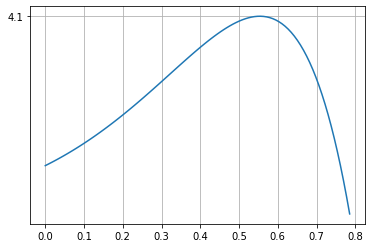

In [286]:
#1.6 Monte-Carlo method of integration

from matplotlib import pyplot as plt

x=np.linspace(0,pi/4,100)

plt.plot(x,f(x))
plt.grid()
plt.yticks(np.arange(4.1,4.11,0.1))
plt.show()



#for creating random points we need to determine f_max 
#from graph it can be seen that maximum point on y-axis is approximately 4.1
#print(f(0.5),f(0.6),f(0.5/2+0.6/2))



In [287]:

def f(x):
    return e**(4*x)*cos(2*x)
            

def monte_carlo(g,N):

    x=[]
    y=[]
    for i in range(N):
        d=np.random.uniform(0,pi/4)
        x.append(d)
        c=np.random.uniform(0,4.1)
        y.append(c)
        n1=0
    for i in range(N):
        if y[i]<f(x[i]):
            n1=n1+1
            
    I_MC=(n1/N)*(b-a)*4.1
    e_mc=(I1-I_MC)*100/I1
    
    return I_MC,e_mc,n1


I_MC,e_mc,n1 = monte_carlo(f,100)
print("For",n1,"random points under f(x):")
print("I_MC is",I_MC,"\nE_MC is",e_mc)



For 69 random points under f(x):
I_MC is 2.2218914042513807 
E_MC is -5.1002179941007455


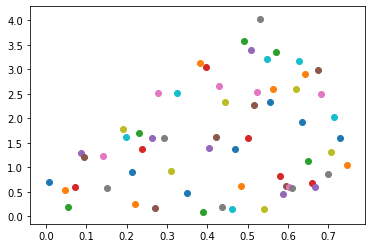

In [288]:
#it was inside of function above in order to check whether the points under f(x) or not and to see how function is working
#(and now, to be honest, I cannot delete it because it looks so beautiful (with 1000 even better), I am sorry)
for i in range(100):
    if y[i]<f(x[i]):
        plt.scatter(x[i],y[i])
plt.show()

### Problem 2

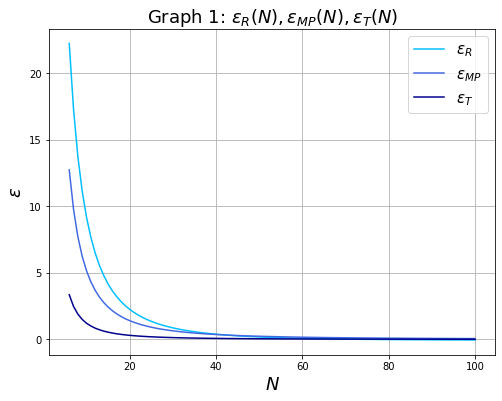

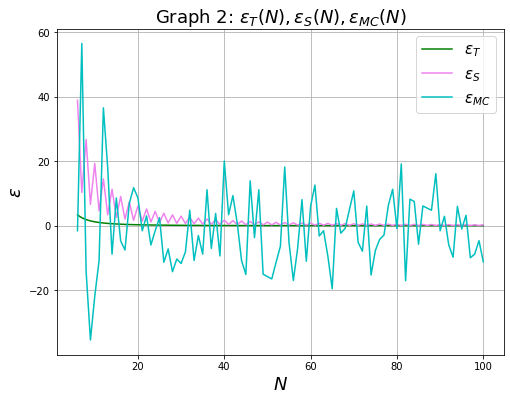

In [289]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return e**(4*x)*cos(2*x)

xx=np.arange(6,101,1)

y1=[]
y2=[]
y3=[]

for i in range(6,101):
    int1,err1=rec(f,i)
    y1.append(err1)
    int2,err2=mid(f,i)
    y2.append(err2)
    int3,err3=trapezoidal(f,i)
    y3.append(err3)

plt.figure(figsize=(8,6))
plt.plot(xx,y1,'deepskyblue',xx,y2,'royalblue',xx,y3,'darkblue')
plt.title(r'Graph 1: $\epsilon_R(N),\epsilon_{MP}(N),\epsilon_T(N)$',size=18)
plt.xlabel(r'$N$',size=18)
plt.ylabel(r'$\epsilon$',size=18)
plt.legend(['$\epsilon_R$', '$\epsilon_{MP}$', '$\epsilon_T$'],prop={'size': 15})
plt.grid()
plt.show()

y4=[]
y5=[]
y6=[]

for i in range(6,101):
    int4,err4=trapezoidal(f,i)
    y4.append(err4)
    int5,err5=simpson(f,i)
    y5.append(err5)
    int6,err6,rn=monte_carlo(f,i)
    y6.append(err6)
    
plt.figure(figsize=(8,6))  
plt.plot(xx,y4,'g',xx,y5,'violet',xx,y6,'c')
plt.title(r'Graph 2: $\epsilon_T(N),\epsilon_S(N),\epsilon_{MC}(N)$',size=18) 
plt.xlabel(r'$N$',size=18)
plt.ylabel(r'$\epsilon$',size=18)
plt.legend(['$\epsilon_T$', '$\epsilon_S$', '$\epsilon_{MC}$'],prop={'size': 15})
plt.grid()
plt.show()
